# Mean, median, mode

## Definition and main characteristics


<img src='images/mean.png'>

**Mean:**
The mean is the average of a set of numbers, calculated by adding them together and then dividing by the quantity of numbers.

**When to Use:** The mean is used when you want the average value. It's suitable for data that is symmetrically distributed without outliers.

**Characteristics:**
* Sensitive to outliers.
* Applicable to numerical continuous data.
* Best for normally distributed data (bell curve).
* Unique value for a given dataset.
* Example: Average test scores, average temperatures.



<img src='images/median.png'>

**Median:**
The median is the middle value in a sorted list of numbers. In a list with an odd number of elements, it is the central number; for an even number of elements, it is the average of the two central numbers.

**When to Use:** The median is ideal for skewed distributions or when dealing with outliers. It represents the middle value of a data set when ordered from least to greatest.

**Characteristics:**
* Not affected by outliers or extremely large/small values.
* Applicable to numerical continuous data; good for ordinal data (data with a natural order).
* Useful for skewed distributions.
* Represents the 50th percentile.
* Example: Median household income, median property prices.

<img src='images/mode.png'>

**Mode:**
The mode is the most frequently occurring value in a dataset.

**When to Use:** The mode is best when you want to know the most frequently occurring value in your data set. It's particularly useful for categorical data.

**Characteristics:**
* Not affected by outliers.
* Applicable to both numerical and categorical data.
* Identifies the most common value. For continuous data, the mode is often referred to in the context of a probability density function rather than the raw data itself.
* There can be more than one mode (bimodal, multimodal) or no mode at all in a data set.
* Example: Most common shoe size sold, most preferred brand.

Let's move to more practical examples.
First, we'll generate a dataset to use.
Next, we'll have a look on how to actually calculate the metrics, despite having built-in python functions.
After that, we'll move to analyzing how some factors affect metrics difference.
Finally, we will list key points again and provide examples from real life data.

### Install libraries

In [1]:
pip install -q -r  requirements.txt


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import libraries

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
from scipy.stats import ttest_ind
import statsmodels.api as sm
import seaborn as sns

### Dataset Description


**Dataset Description:** 

This dataset mimics how long users spend on an app or website during their sessions. We create it using Python, starting with random session durations and then adjusting them to have a specific average time (e.g., 10 minutes) by shifting the values.
You can use your own data and try out on it.

In [3]:
#Generate the data
#np.random.randn() is a NumPy function used to generate an array of random numbers from a standard normal distribution 
#(also known as a Gaussian distribution with mean 0 and standard deviation 1).
data_norm = np.random.randn(1000)

#Shift the mean to 10
new_mean = 10
session_duration = data_norm + new_mean

### Calculating metrics by hand and comparing to built-in functions

Let's explore how mean, median, and mode are actually calculated according to their definition, beyond using Python's built-in functions. The compare_statistics function does this by manually computing these metrics and comparing the results with standard library functions, providing insight into the underlying calculations.
These examples will help to understand the process of calculations better.

In [4]:
def compare_statistics(data):
    #Calculate mean
    calc_mean = data.sum()/ len(data)
    print(f"\033[1mCalculated mean:\033[0m {round(calc_mean,6):.2f}; \033[1mBuilt-in mean:\033[0m {round(data.mean(),6):.2f}.")

    #Calculate median
    if len(data) % 2 != 0:
      mid_index = len(data) // 2 # The only one middle index
      calc_median = (sorted(data)[mid_index])
    else:
      # Calculate the indices of the two middle elements
      mid_index1 = len(data) // 2 - 1  # First middle index
      mid_index2 = len(data) // 2      # Second middle index

      # Find the median (average of the two middle values) for the sorted df
      calc_median = (sorted(data)[mid_index1] + sorted(data)[mid_index2]) / 2
    print(f"\033[1mCalculated median:\033[0m {round(calc_median,6):.2f}; \033[1mBuilt-in median:\033[0m {round(np.median(data),6):.2f}.")

    #Calculate mode
    if len(data) != len(set(data)):
        frequent_values = pd.Series(data)
        calc_mode = frequent_values.value_counts().nlargest(1).index[0]
        print(f"\033[1mCalculated mode:\033[0m {round(calc_mode,6):.2f}; \033[1mBuilt-in mode:\033[0m {round(stats.mode(data)[0],6):.2f}.")

    else:
        print("\033[1mMode:\033[0m data has no mode.")


In [5]:
#Apply function
compare_statistics(session_duration)

Calculated mean: 10.00; Built-in mean: 10.00.
Calculated median: 10.00; Built-in median: 10.00.
Mode: data has no mode.


## Differences

<img src='images/differences.png'>

**Differences:**

**Robustness to Outliers:**
* Mean: Sensitive to outliers; extreme values can greatly influence the mean.
* Mode and Median: Not affected by outliers; they can provide a more robust representation of the central tendency in the presence of outliers.

**Applicable data types:**
* Mean: Applicable to numerical continuous data.
* Mode: Applicable to both numerical and categorical data.
* Median: Applicable to numerical continuous data; useful for skewed distributions.

**More about data types:**
* **Nominal Data**: Only the mode is applicable.
* **Ordinal Data**: Both median and mode are applicable; the mean is not typically used.
* **Interval Data**: Mean, median, and mode are all applicable.
Ratio Data: Mean, median, and mode are all applicable.
* **Discrete Data**: Mean, median, and mode are all applicable.
* **Continuous Data**: Mean, median, and mode are all applicable, but the mode may require data to be grouped into intervals.

**Uniqueness:**
* Mean: Unique value for a given dataset.
* Mode: A dataset can have multiple modes, the only one mode or no mode at all.
* Median: Unique value for a given dataset.

Let's look at some of these differences on practice.
First, we'll calculate statistics for numerical continuous data and check for uniqueness of the metrics. Also, we'll do it for numerical discrete data to observe the difference.
After that, we'll explore cases with presence/absence of outliers and different distribution shapes.

### Calculating and displaying metrics

Below is the code to display summary statistics and histogram of values.

In [6]:
def hist_and_statistics(data):
  #Display hist
  sns.histplot(data, bins=30, alpha=0.5)
  plt.axvline(data.mean(), color='black', linestyle='--', label=f'Mean: {data.mean():.2f}')
  plt.axvline(np.median(data), color='darkviolet', linestyle='--', label=f'Median: {np.median(data):.2f}')
  plt.axvline(stats.mode(data)[0], color='maroon', linestyle='--', label=f'Mode: {stats.mode(data)[0]:.2f}')
  plt.title('Distribution of 1000 random values')
  plt.legend()
  plt.show()

  #Display statistics
  print("\033[1mStatistics:\033[0m")
  print("\033[1mMean:\033[0m", round(data.mean(),2))
  print("\033[1mMedian:\033[0m", round(np.median(data),2))
  print("\033[1mMode:\033[0m", round(stats.mode(data)[0],2))

  #Display min, max and number of values
  print("\033[1mMin value:\033[0m",round(data.min(),2))
  print("\033[1mMax value:\033[0m",round(data.max(),2))

  print("\033[1mNumber of unique values:\033[0m",len(np.unique(data)))
  print("\033[1mTotal number of values:\033[0m",len(data))

  #Display summary statistics.
  #The describe() function in pandas provides a quick overview of a dataset's statistical characteristics, summarizing key metrics like mean, standard deviation, and quartiles, saving time compared to calculating each metric separately.
  df = pd.DataFrame(data, columns=['Values'])
  return df.describe().T

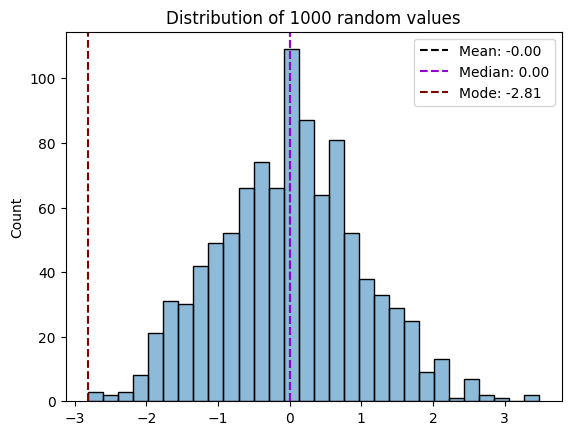

Statistics:
Mean: -0.0
Median: 0.0
Mode: -2.81
Min value: -2.81
Max value: 3.48
Number of unique values: 1000
Total number of values: 1000


,count,mean,std,min,25%,50%,75%,max
Values,1000.0,-0.002315,1.003325,-2.812483,-0.680931,0.000323,0.651532,3.481033


In [7]:
#Apply function
hist_and_statistics(data_norm)

The function displays a minimum value for a mode in the dataset. However, since each value in the dataset is unique, there's no any value that occurs more frequently than others. In fact, the dataset has no mode.

Let's repeat the calculations for an array of int values.

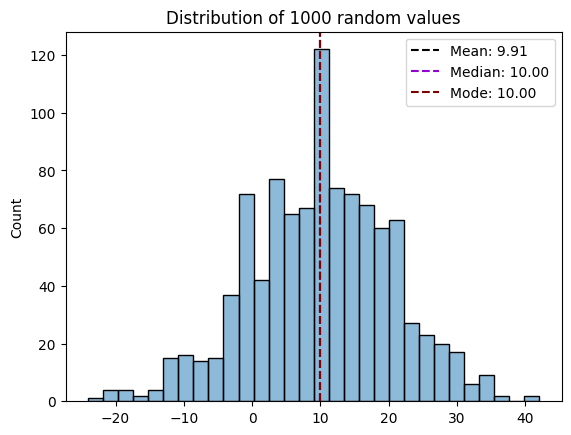

Statistics:
Mean: 9.91
Median: 10.0
Mode: 10
Min value: -24
Max value: 42
Number of unique values: 60
Total number of values: 1000


,count,mean,std,min,25%,50%,75%,max
Values,1000.0,9.906,10.376938,-24.0,3.0,10.0,17.0,42.0


In [8]:
#Generate the data - 1000 int data points following the normal distribution
data_norm_for_int = np.random.normal(size=1000,loc=0, scale=10,)
data_int = np.round(data_norm_for_int).astype(int)

# Shift the mean to 10
new_mean = 10
session_duration_int = data_int + new_mean

#Apply function
hist_and_statistics(session_duration_int)

### Outliers

<img src='images/outliers.png'>

Let's observe how mean, median and mode are affected by outliers.
Below there's a function remove_outliers that removes outliers from the data using interquantile range (IQR).
After that we generate data and add several outliers artificially.
We calculate mean, median and mode for initial and cleaned data and compare them.
Also, plotting the data helps to compare the metrics visually.

Mean of data with outliers: 4.91; Mean of data without outliers: 4.88.
Median of data with outliers: 5.00; Median of data without outliers: 5.00.
Mode of data with outliers: 6.00; Mode of data without outliers: 6.00.


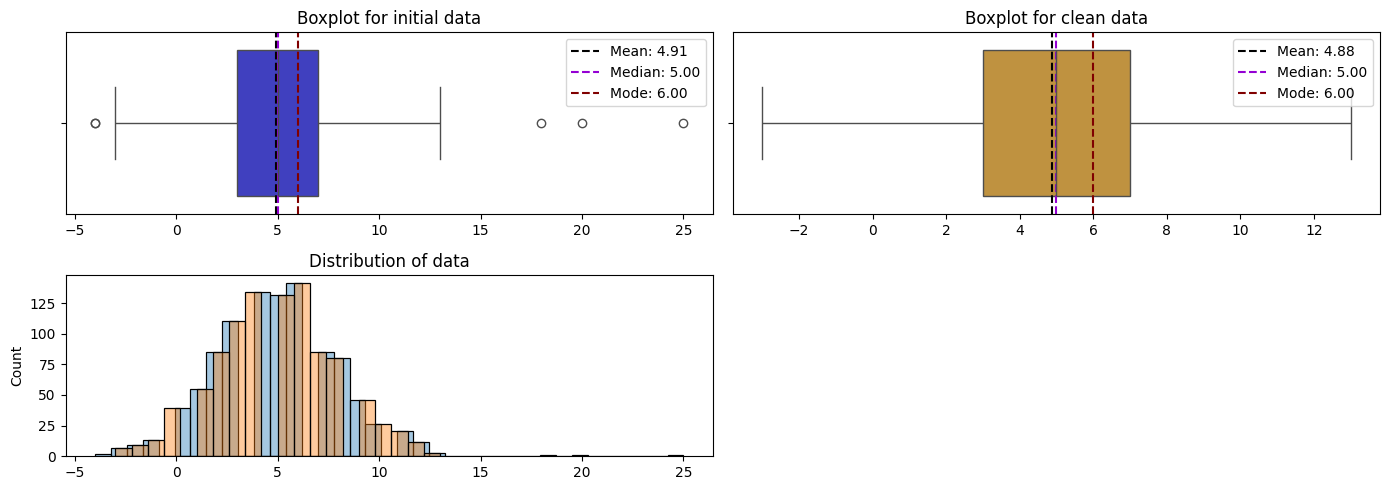

In [9]:
#Write a function to remove outliers with IQR method
def remove_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Generate dataset. In this case I generate 1000 int values which follow the normal distribution
np.random.seed(0) # For reproducibility
data_norm_for_int = np.random.normal(size=1000,loc=5, scale=3) # 1000 data points
data_int = np.round(data_norm_for_int).astype(int)

#Add outliers. I add several values as outliers, since they are relatively large for initial data values
data_with_outliers = np.concatenate([data_int, [20, 25, 18]])

# Remove outliers. We apply the function remove_outliers to the initial dataset and store the result in the clean_data
cleaned_data = remove_outliers(data_with_outliers)

#Print metrics out
print(f"\033[1mMean of data with outliers:\033[0m {data_with_outliers.mean():.2f}; \033[1mMean of data without outliers:\033[0m {cleaned_data.mean():.2f}.")
print(f"\033[1mMedian of data with outliers:\033[0m {np.median(data_with_outliers):.2f}; \033[1mMedian of data without outliers:\033[0m {np.median(cleaned_data):.2f}.")
print(f"\033[1mMode of data with outliers:\033[0m {stats.mode(data_with_outliers)[0]:.2f}; \033[1mMode of data without outliers:\033[0m {stats.mode(cleaned_data)[0]:.2f}.")

#Plot data
fig, axs = plt.subplots(2,2, figsize = (14,5))
axs[1, 1].remove()
#Boxplots
sns.boxplot(data_with_outliers, color='blue', saturation=0.5, ax = axs[0,0], orient='h')
sns.boxplot(cleaned_data, color='orange', saturation=0.5, ax = axs[0,1], orient='h')

#Histogramm
#Also, let's plot the histogram to understand how the data looks like, for example, why we have mode equal to 6
sns.histplot(data_with_outliers, alpha = 0.4, ax = axs[1,0])
sns.histplot(cleaned_data,  alpha = 0.4, ax = axs[1,0])

#Add lines for mean, median, mode
axs[0,0].axvline(data_with_outliers.mean(), color='black', linestyle='--', label=f'Mean: {data_with_outliers.mean():.2f}')
axs[0,0].axvline(np.median(data_with_outliers), color='darkviolet', linestyle='--', label=f'Median: {np.median(data_with_outliers):.2f}')
axs[0,0].axvline(stats.mode(data_with_outliers)[0], color='maroon', linestyle='--', label=f'Mode: {stats.mode(data_with_outliers)[0]:.2f}')

axs[0,1].axvline(cleaned_data.mean(), color='black', linestyle='--', label=f'Mean: {cleaned_data.mean():.2f}')
axs[0,1].axvline(np.median(cleaned_data), color='darkviolet', linestyle='--', label=f'Median: {np.median(cleaned_data):.2f}')
axs[0,1].axvline(stats.mode(cleaned_data)[0], color='maroon', linestyle='--', label=f'Mode: {stats.mode(cleaned_data)[0]:.2f}');

#Add titles and legends
for i, y in zip([(0,0), (0,1), (1,0)], ['Boxplot for initial data', 'Boxplot for clean data', 'Distribution of data']):
    axs[i[0], i[1]].set_title(y)  # Use set_title instead of title
    handles, labels = axs[i[0], i[1]].get_legend_handles_labels()
    if labels:
       axs[i[0], i[1]].legend() 

plt.tight_layout()

### Distribution form matters

<img src='images/distribution.png'>

Let's observe how the form of distribution affects mean. median and mode.

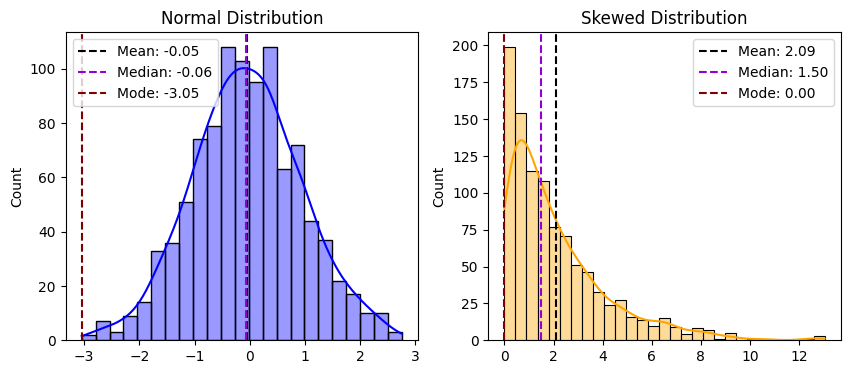

Normal Distribution - Mean: -0.05, Median: -0.06, Mode: -3.05
Skewed Distribution - Mean: 2.09, Median: 1.50, Mode: 0.00


In [10]:

# Generate a normally distributed dataset
np.random.seed(0)  # For reproducibility
normal_data = np.random.randn(1000)  # 1000 data points

# Generate a skewed dataset
skewed_data = np.random.exponential(scale=2.0, size=1000)  # Exponential distribution is skewed

# Calcule mean, median, and mode for both datasets
mean_normal = np.mean(normal_data)
median_normal = np.median(normal_data)
mode_normal = stats.mode(normal_data)[0]  # Mode might not be meaningful for continuous data

mean_skewed = np.mean(skewed_data)
median_skewed = np.median(skewed_data)
mode_skewed = stats.mode(skewed_data)[0]  # Mode might not be meaningful for continuous data

# Plot the distributions
plt.figure(figsize=(10, 4))

# Normal Distribution Plot
plt.subplot(1, 2, 1)
sns.histplot(normal_data, kde=True, color='blue', alpha=0.4)
plt.title('Normal Distribution')
plt.axvline(mean_normal, color='black', linestyle='--', label=f'Mean: {mean_normal:.2f}')
plt.axvline(median_normal, color='darkviolet', linestyle='--', label=f'Median: {median_normal:.2f}')
plt.axvline(mode_normal, color='maroon', linestyle='--', label=f'Mode: {mode_normal:.2f}')

plt.legend()

# Skewed Distribution Plot
plt.subplot(1, 2, 2)
sns.histplot(skewed_data, kde=True, color='orange', alpha=0.4)
plt.title('Skewed Distribution')
plt.axvline(mean_skewed, color='black', linestyle='--', label=f'Mean: {mean_skewed:.2f}')
plt.axvline(median_skewed, color='darkviolet', linestyle='--', label=f'Median: {median_skewed:.2f}')
plt.axvline(mode_skewed, color='maroon', linestyle='--', label=f'Mode: {mode_skewed:.2f}')

plt.legend()

plt.show()

# Print mean, median, and mode for both datasets
print(f"\033[1mNormal Distribution\033[0m - Mean: {mean_normal:.2f}, Median: {median_normal:.2f}, Mode: {mode_normal:.2f}")
print(f"\033[1mSkewed Distribution\033[0m - Mean: {mean_skewed:.2f}, Median: {median_skewed:.2f}, Mode: {mode_skewed:.2f}")


<img src='images/key_points.png'>

**Key Points to Consider:**

* **Outliers:** If your data has outliers, the mean can be misleading. In such cases, the median is a better measure of central tendency.

* **Distribution Shape:** For symmetric distributions, the mean, median, and mode are the same. In skewed distributions, they differ, and the median often better represents the center of the data.

* **Data Type:** The mean requires numeric, interval or ratio data (where mathematical operations like addition and subtraction are meaningful). The median and mode can be used with ordinal data, and the mode can even be used with nominal data (like categories).

Below there are examples how excactly presence of outliers and distribution shape can affect mean, median and mode.

## Examples

<img src='images/examples.png'>

**When to Use Mean:**
* Product Analytics: Average time spent on a website or app - useful for understanding user engagement.
* Product Analytics: Average revenue per user (ARPU) - crucial for assessing the profitability of a product.
* Product Analytics: Average cost of goods sold - to understand the typical cost involved in producing goods.
* General: Average temperatures over a month - for climatic analysis.
* General: Average scores in a standardized test - to assess overall performance.
* General: Average age of employees in a company - useful for HR demographic analysis.

**When to Use Median:**
* Product Analytics: Median transaction value - to understand typical customer spending, especially when there are a few very large or small transactions.
* Product Analytics: Median time to purchase from first website visit - gives a better sense of a typical customer journey, unaffected by extreme outliers.
* Product Analytics: Median load time of a webpage - to gauge user experience, as extremely slow loads can skew the mean.
* General: Median income in a survey - gives a more realistic measure of central income, especially in the presence of extreme values.
* General: Median house prices in real estate - to understand the market's central price point, which isn't skewed by extremely high or low property values.
* General: Median age in a population study - useful in demographics, especially in populations with age extremes.

**When to Use Mode:**
* Product Analytics: Most common product category purchased - to determine which category is most popular among customers.
* Product Analytics: Mode of payment methods used in transactions - to understand the most preferred payment method by customers.
* Product Analytics: Most frequent time of day for app usage - helps in targeting specific times for marketing or maintenance.
* General: Mode shoe size sold in a retail store - to optimize inventory for the most demanded sizes.
* General: Most common car color chosen by buyers - useful for manufacturing decisions.
* General: Most preferred type of content (e.g., videos, blogs, infographics) on a website - helps in content strategy.